# Global Power Plant Database

Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

    country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification
    country_long (text): longer form of the country designation
    name (text): name or title of the power plant, generally in Romanized form
    gppd_idnr (text): 10 or 12 character identifier for the power plant
    capacity_mw (number): electrical generating capacity in megawatts
    latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    primary_fuel (text): energy source used in primary electricity generation or export
    other_fuel1 (text): energy source used in electricity generation or export
    other_fuel2 (text): energy source used in electricity generation or export
    other_fuel3(text): energy source used in electricity generation or export
    commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
    owner (text): majority shareholder of the power plant, generally in Romanized form
    source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    url(text): web document corresponding to the source field
    geolocation_source (text): attribution for geolocation information
    wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    year_of_capacity_data (number): year the capacity information was reported
    generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
    generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
    generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
    generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
    generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
    generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
    generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
    generation_data_source (text): attribution for the reported generation information
    estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
    estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 
    estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 
    estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016 
    estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017 
    estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
    estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014 
    estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
    estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
    estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017 

   **Fuel Type Aggregation**

We define the "Fuel Type" attribute of our database based on common fuel categories. 

    Prediction :   
        Make two prediction  
        1) Primary Fuel    
        2) capacity_mw 

# Importing required library 

In [2]:
#for pictoral represating and including dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for model and other requrired libraries

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder


#for warning ignorance

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Dell\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_2         3.1 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda               pkgs/main::conda-4.9.2-py38haa95532_0 --> conda-forge::conda-4.10.3-py38haa244fe_2




p



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




Verifying transaction: ...working... done
Executing transaction: ...working... done


# Importing the dataset

In [3]:
gpp=pd.read_csv(r'D:\DT EVAL Projects\GPP.csv')

In [4]:
gpp.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


There are two labels that need to be predicted. 
The first one is regression with the label capacity_mw and the second one is classification with the target variable primary fuel


**Exploratory Data Analysis(EDA)**

In [5]:
gpp.shape

(908, 25)

There are 908 rows and 25 column names present in our dataset

In [6]:
gpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

Observation:

There are some numerical values and some categorical columns

In [7]:
gpp.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

There are many null values in the dataset

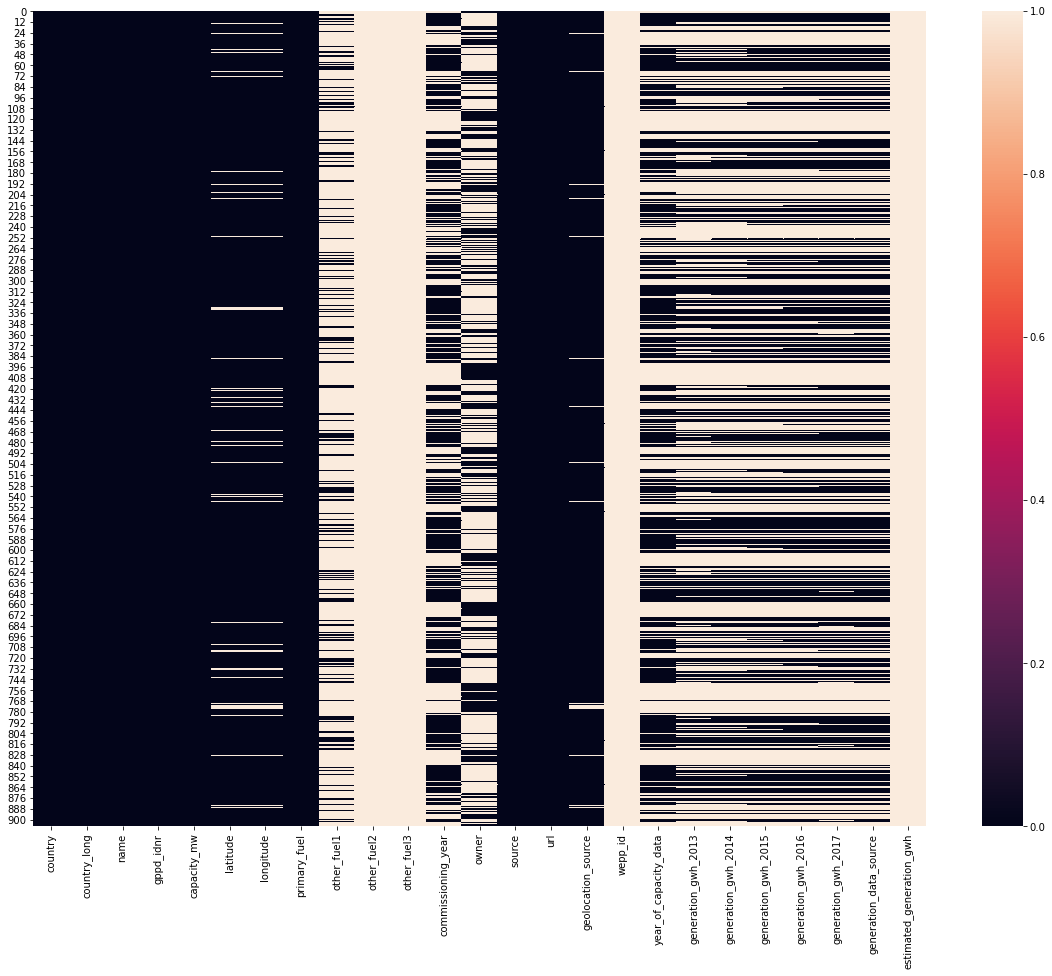

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(gpp.isnull())
plt.show()

Visualization of null values

In [9]:
gpp.drop(columns=['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

Droped the columns that dont have any non null values

In [10]:
gpp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are many null values present in data, the column that contain only null values will be dropped

In [11]:
gpp.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


    There is very high variation and skewnwss in data of generation_gwh for all the years.
    There is high skewness in capacity_mw.
    There is only one data in year of capacity data i.e 2018, so it is better to drop it as it is not giving any insight about the data.

In [12]:
gpp.drop(columns=['year_of_capacity_data'],inplace=True)

Droped year of capacity data from dataset

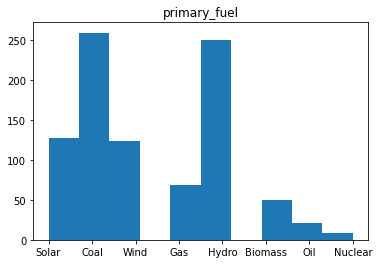

In [13]:
#Histogram

gpp['primary_fuel'].hist(grid=False)
plt.title('primary_fuel')
plt.show()

    The representation of the column primary fuel as it is one the target variable

    There is class imbalance in this data


**High skewness in the column capacity_mw**

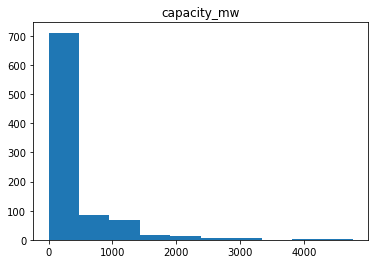

In [14]:
#Histogram

gpp['capacity_mw'].hist(grid=False)
plt.title('capacity_mw')
plt.show()

**Visual representation of the capacity_mw column, there is high skewness**

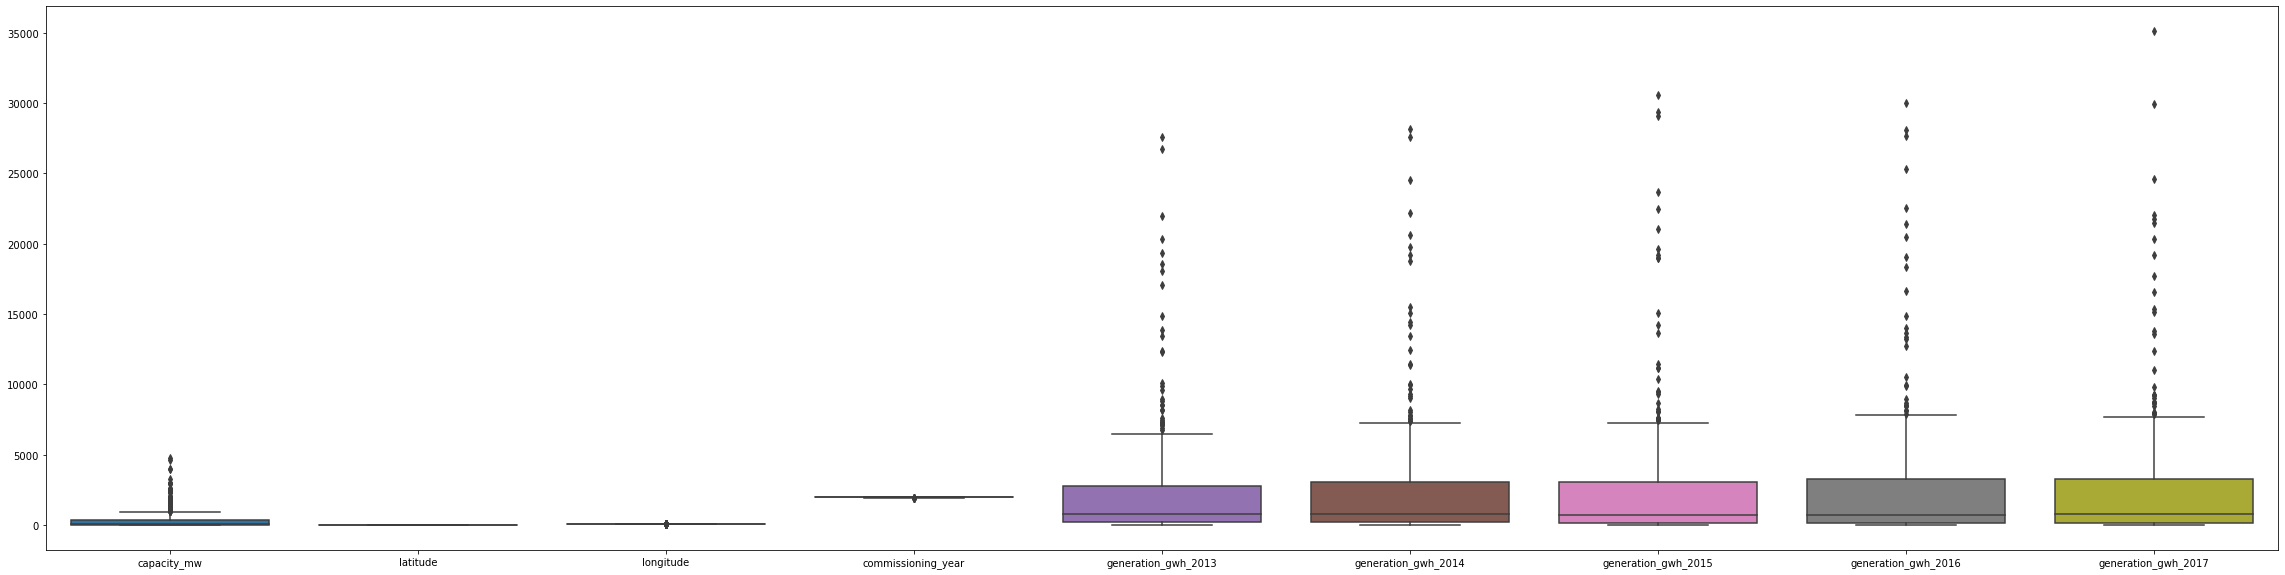

In [15]:
fig,ax=plt.subplots(1,1,figsize=(40,10))
sns.boxplot(data=gpp,ax=ax)
plt.show()

The boxplot shows that there are many outliers

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>]],
      dtype=object)

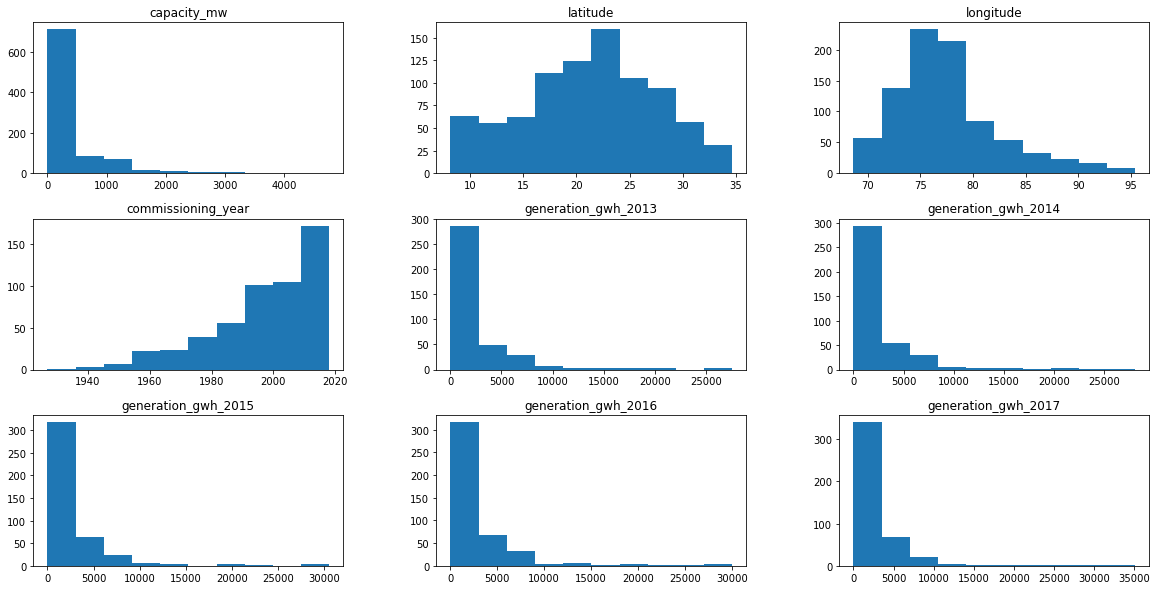

In [16]:
gpp.hist(figsize=(20,10),grid=False)

The data is now less skewed and more towards normal distribution

<AxesSubplot:>

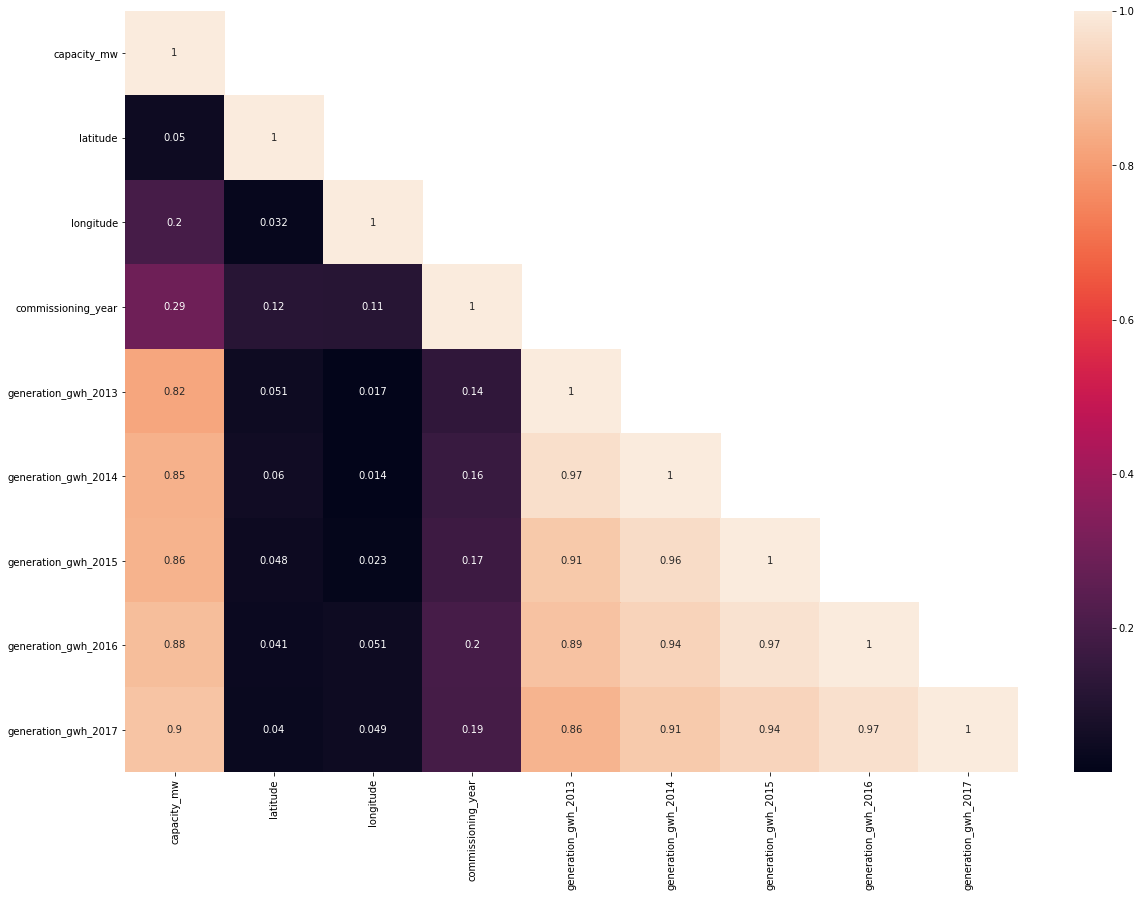

In [17]:
#correlation matix

corr_mat=gpp.corr()
mat=np.array(corr_mat)
mat[np.tril_indices_from(mat)]=False

fig=plt.gcf()
fig.set_size_inches(20,14)
sns.heatmap(data=corr_mat,mask=mat,annot=True)

It appears that there is high multicollinearity between certain columns.

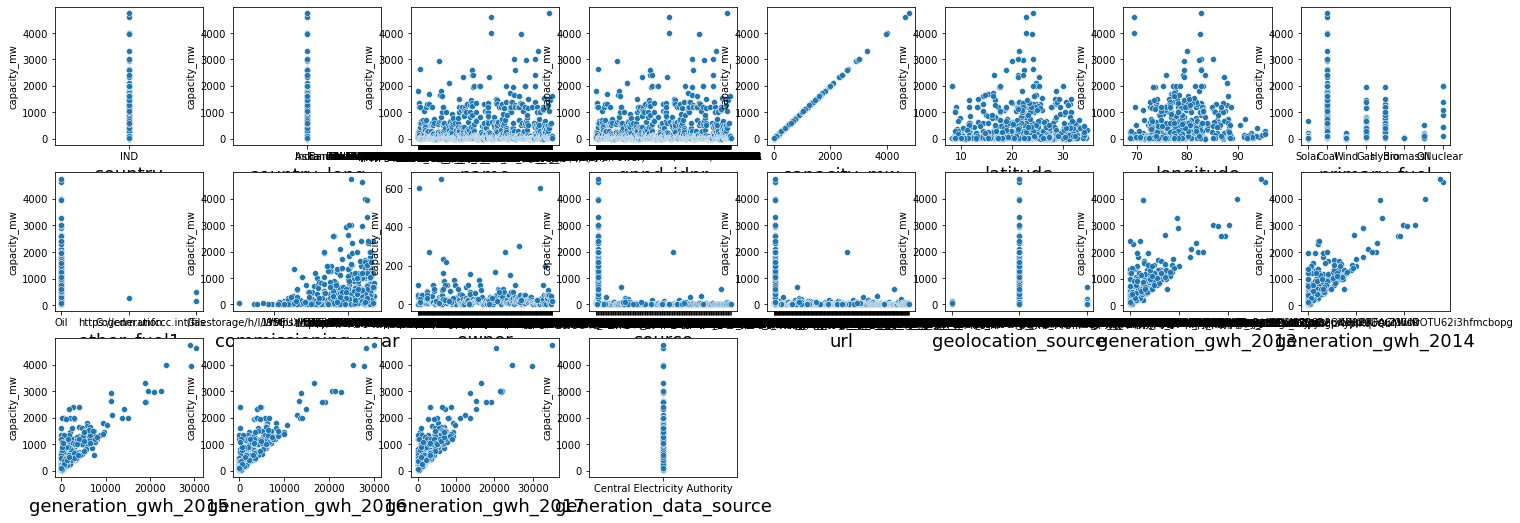

In [18]:
plt.figure(figsize=(25,30))
graph=1

for columns in gpp:
    if graph<=40:
        ax=plt.subplot(10,8,graph)
        sns.scatterplot(x=gpp[columns],y='capacity_mw',data=gpp)
        plt.xlabel(columns,fontsize=18)
    graph+=1
plt.show()    

Scatter plot shows that there does not exist relationship between capacity_mw and some variables. We will drop those variables

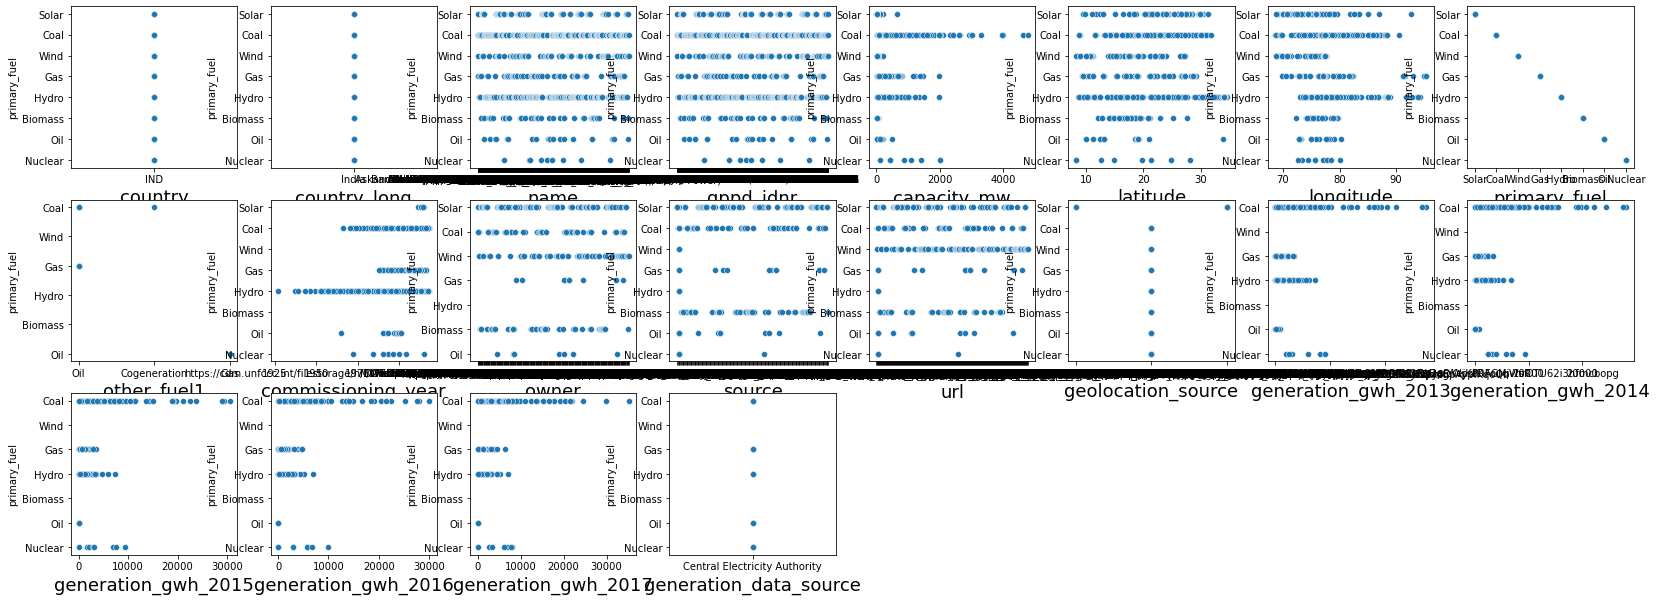

In [19]:
plt.figure(figsize=(28,35))
graph=1

for columns in gpp:
    if graph<=40:
        ax=plt.subplot(10,8,graph)
        sns.scatterplot(x=gpp[columns],y='primary_fuel',data=gpp)
        plt.xlabel(columns,fontsize=18)
    graph+=1
plt.show()    

Some variable do not have any relationship with primary_fuel

In [20]:
gpp.skew()

capacity_mw            3.193257
latitude              -0.143622
longitude              1.100942
commissioning_year    -1.056132
generation_gwh_2013    3.416338
generation_gwh_2014    3.357683
generation_gwh_2015    3.679016
generation_gwh_2016    3.524785
generation_gwh_2017    3.576849
dtype: float64

There is high skewness in some variables

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

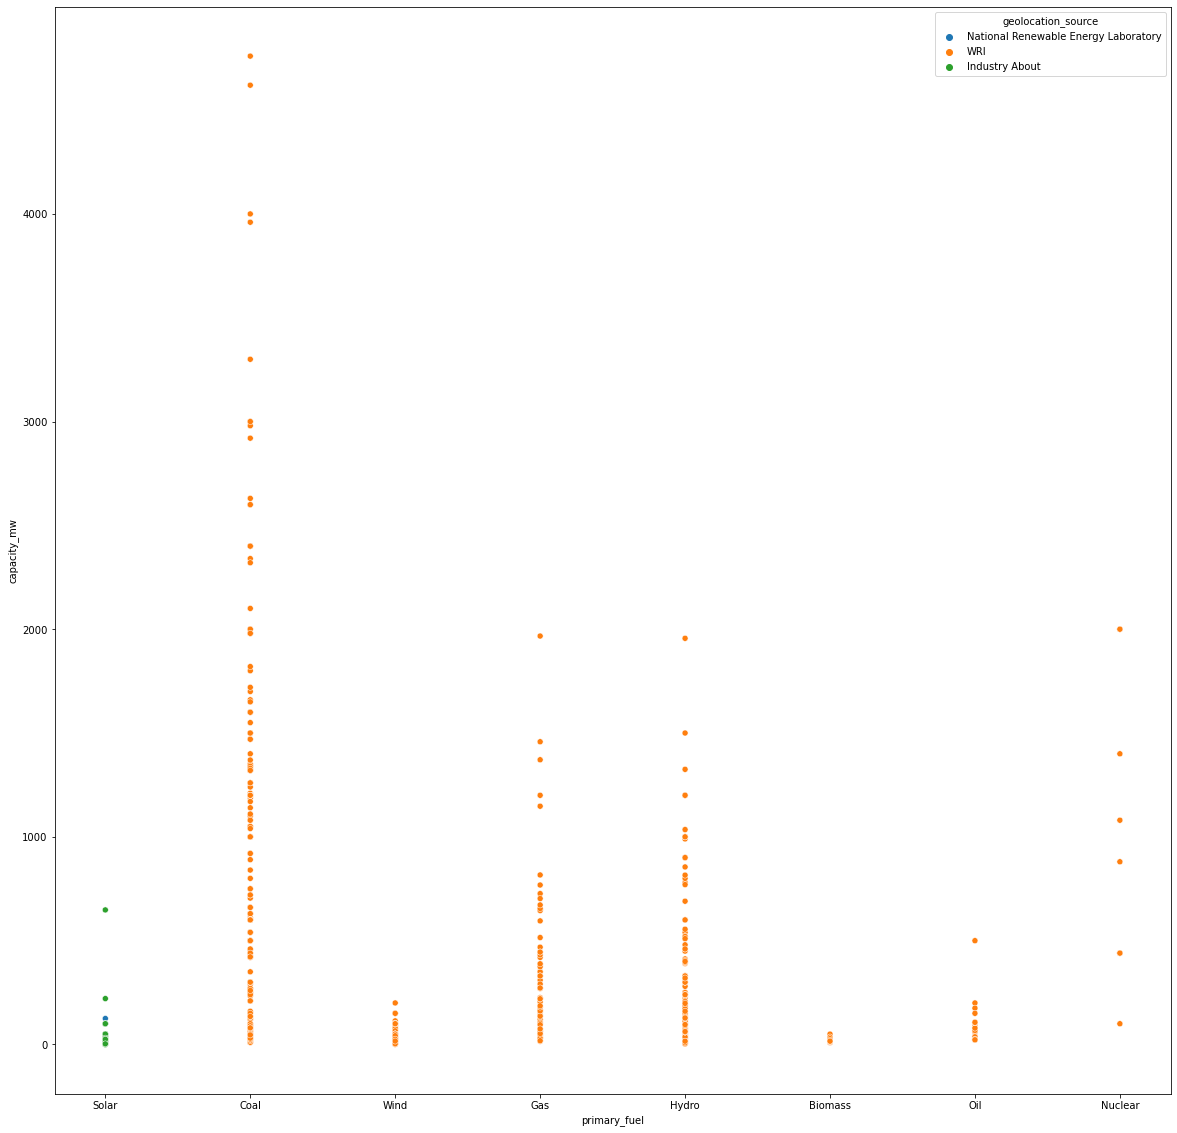

In [21]:
fig,axes=plt.subplots(1,1,figsize=(20,20))
sns.scatterplot(x='primary_fuel',y='capacity_mw',hue='geolocation_source',data=gpp)

The scatter plot shows the relationship between capacity_mw and primary_level

In [22]:
gpp['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

There is only a single entry in generation_data_source. It will not help in prediction, so it is better to drop it.

In [23]:
gpp.drop(columns=['generation_data_source'],axis=1,inplace=True)

dropped the column

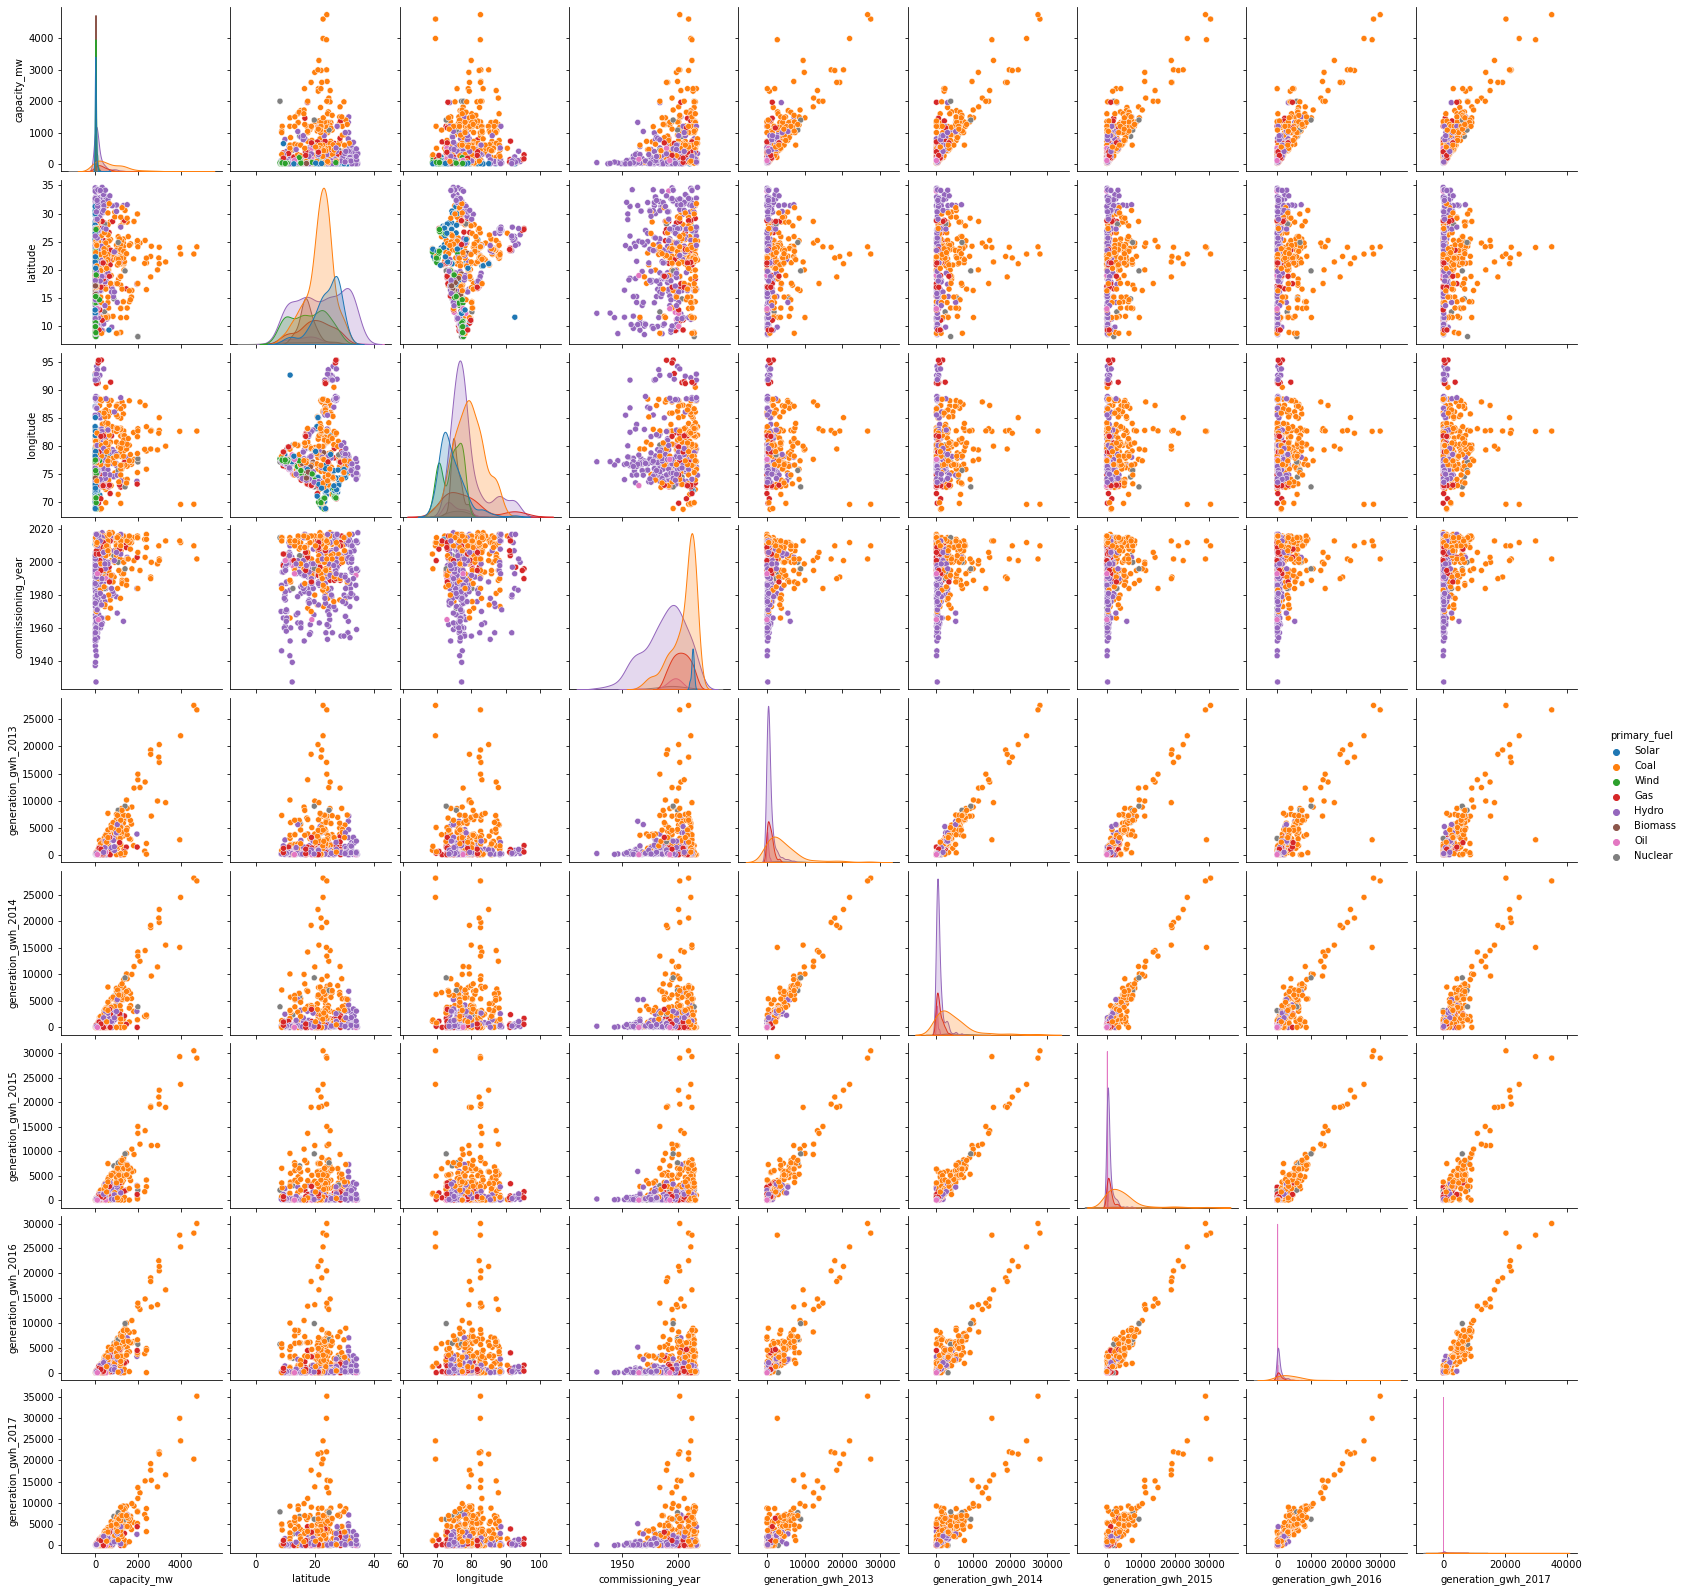

In [24]:
sns.pairplot(gpp,hue='primary_fuel')

Pairplot shows that coal is associated with the high capacity.

**Dealing with null Values by using KNNIMPUTER**

In [25]:
#dealing with null values

from sklearn.impute import KNNImputer

knim=KNNImputer(n_neighbors=3)
gpp_filled=knim.fit_transform(gpp[['latitude','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])

gpp1=pd.DataFrame(gpp_filled)

Dealt with null values using KNNImputer

In [26]:
gpp1.columns=['latitude','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
gpp1

,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,2011.000000,573.288667,576.547333,482.349333,551.226333,529.008000
1,24.7663,74.6090,1967.000000,3040.819933,2531.734217,298.881417,265.260367,241.997267
2,21.9038,69.3732,2009.333333,1941.346333,2420.079333,1942.164800,2280.040517,1644.988333
3,23.8712,91.3602,2004.000000,631.777928,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.4091,2015.000000,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,2016.000000,193.563333,81.211333,0.994875,233.596650,865.400000
904,12.8932,78.1654,1977.666667,259.705351,221.352445,125.761164,41.617533,1685.693383
905,15.2758,75.5811,1961.333333,169.614333,96.796917,63.411350,37.395417,61.474417
906,24.3500,73.7477,1991.333333,781.667033,1143.319383,965.062900,828.058550,1281.792517


**Renaming the columns**

In [27]:
gpp['other_fuel1']=gpp['other_fuel1'].fillna(gpp['other_fuel1'].mode()[0])
gpp['owner']=gpp['owner'].fillna(gpp['owner'].mode()[0])
gpp['geolocation_source']=gpp['geolocation_source'].fillna(gpp['geolocation_source'].mode()[0])

gpp['commissioning_year']=gpp1['commissioning_year']
gpp['generation_gwh_2013']=gpp1['generation_gwh_2013']
gpp['generation_gwh_2014']=gpp1['generation_gwh_2014']
gpp['generation_gwh_2015']=gpp1['generation_gwh_2015']
gpp['generation_gwh_2016']=gpp1['generation_gwh_2016']
gpp['generation_gwh_2017']=gpp1['generation_gwh_2017']
gpp['latitude']=gpp1['latitude']
gpp['longitude']=gpp1['longitude']
gpp.isna().sum()



country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

**Dealing with null values of the categorical columns**

In [28]:
gpp['country'].value_counts()

IND    908
Name: country, dtype: int64

There is a single country, so it is better to drop it

In [29]:
gpp['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

There is a single country, so it is better to drop it

In [30]:
gpp['name'].value_counts()

KARAIKAL                                     1
Frost International Palankottai Wind Farm    1
Nallakonda Wind Farm                         1
BANDAKHAR TPP                                1
SHIRPUR                                      1
                                            ..
Mandrup - Giriraj Solar Power Plant          1
TANAKPUR                                     1
CHHABRA TPS                                  1
Kottamangalam Wind Farm                      1
ITPCL TPP                                    1
Name: name, Length: 908, dtype: int64

There are different names for each row, so it is better to drop it

In [31]:
gpp['gppd_idnr'].value_counts()

IND0000121    1
IND0000010    1
IND0000248    1
WRI1020007    1
WRI1019962    1
             ..
WRI1019935    1
IND0000229    1
IND0000285    1
IND0000461    1
IND0000141    1
Name: gppd_idnr, Length: 908, dtype: int64

There are different gppd_idnr for each row, so it is better to drop it

In [32]:
gpp.drop(columns=['name','gppd_idnr','country_long','country'],axis=1,inplace=True)

columns dropped

In [33]:
#treating outliers

#finding the quantile of the data usng countinous columns

col=gpp.drop(columns=['primary_fuel','other_fuel1','source','url','geolocation_source'])
Q1=col.quantile(0.25)
Q3=col.quantile(0.75)
IQR=Q3-Q1

#removing outlier using IQR method

gpp_new=col[~((col<(Q1-1.5*IQR))|(col>(Q3+1.5*IQR))).any(axis=1)]

print("shape before and after")
print("shape before".ljust(20),":",col.shape)
print("shape after".ljust(20),":",gpp_new.shape)
print("shape before".ljust(20),":",(col.shape[0]-gpp_new.shape[0])/col.shape[0])


shape before and after
shape before         : (908, 10)
shape after          : (703, 10)
shape before         : 0.22577092511013216


We can't apply this method, as we are losing 22% data

In [34]:
from sklearn.preprocessing import LabelEncoder

labenc=LabelEncoder()

Applying label encoder

In [36]:
a=labenc.fit_transform(gpp['primary_fuel'])
b=labenc.fit_transform(gpp['other_fuel1'])
c=labenc.fit_transform(gpp['owner'])
d=labenc.fit_transform(gpp['source'])
e=labenc.fit_transform(gpp['url'])
f=labenc.fit_transform(gpp['geolocation_source'])

Fitting the data

In [37]:
gpp['primary_fuel']=a
gpp['other_fuel1']=b
gpp['owner']=c
gpp['source']=d
gpp['url']=e
gpp['geolocation_source']=f
gpp

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2,2011.000000,229,109,128,1,573.288667,576.547333,482.349333,551.226333,529.008000
1,98.0,24.7663,74.6090,1,2,1967.000000,258,174,173,2,3040.819933,2531.734217,298.881417,265.260367,241.997267
2,39.2,21.9038,69.3732,7,2,2009.333333,2,21,205,2,1941.346333,2420.079333,1942.164800,2280.040517,1644.988333
3,135.0,23.8712,91.3602,2,2,2004.000000,5,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,2016.000000,5,22,58,2,193.563333,81.211333,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2,1977.666667,114,77,22,0,259.705351,221.352445,125.761164,41.617533,1685.693383
905,25.5,15.2758,75.5811,7,2,1961.333333,5,21,260,2,169.614333,96.796917,63.411350,37.395417,61.474417
906,80.0,24.3500,73.7477,1,2,1991.333333,91,59,82,2,781.667033,1143.319383,965.062900,828.058550,1281.792517


Substituted the values

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'primary_fuel'}>],
       [<AxesSubplot:title={'center':'other_fuel1'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'owner'}>,
        <AxesSubplot:title={'center':'source'}>],
       [<AxesSubplot:title={'center':'url'}>,
        <AxesSubplot:title={'center':'geolocation_source'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:>]], dtype=object)

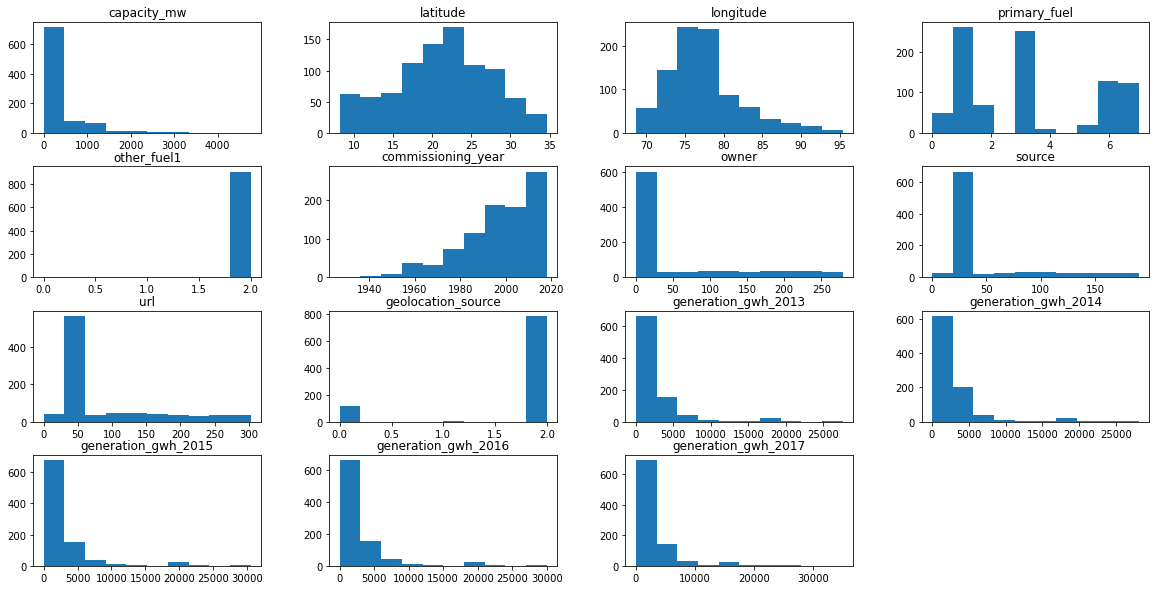

In [38]:
gpp.hist(figsize=(20,10),grid=False)

The data is now less skewed

**Model with Target Variable: primary_fuel**

In [39]:
y1=gpp['primary_fuel']
x1=gpp.drop(['primary_fuel'],axis=1)

Spliting the data

In [40]:
#handling class Imbalance problem by over sampling

from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_over,y_over=sm.fit_resample(x1,y1)

Dealing with problem of class imblance

<AxesSubplot:title={'center':'quality'}, xlabel='primary_fuel'>

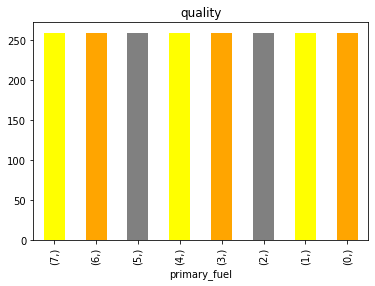

In [41]:
pd.DataFrame(y_over).value_counts().plot(kind='bar',title='quality',color=['yellow','orange','grey'])

Now, the classes are equal

In [42]:
ygpp=pd.Series(y_over)
ygpp.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

Converted the data in the series

In [43]:
xgpp=pd.DataFrame(X_over)
xgpp.head()

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2,2011.000000,229,109,128,1,573.288667,576.547333,482.349333,551.226333,529.008000
1,98.0,24.7663,74.6090,2,1967.000000,258,174,173,2,3040.819933,2531.734217,298.881417,265.260367,241.997267
2,39.2,21.9038,69.3732,2,2009.333333,2,21,205,2,1941.346333,2420.079333,1942.164800,2280.040517,1644.988333
3,135.0,23.8712,91.3602,2,2004.000000,5,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,2,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


Converted the xgpp(from dataset) into dataframe

In [44]:
xgpp.skew()

capacity_mw            2.722773
latitude               0.061585
longitude              1.519646
other_fuel1           -6.504280
commissioning_year    -0.876404
owner                  1.037699
source                 1.398432
url                    1.365635
geolocation_source    -2.327351
generation_gwh_2013    3.355027
generation_gwh_2014    3.357463
generation_gwh_2015    3.511897
generation_gwh_2016    3.332215
generation_gwh_2017    3.083829
dtype: float64

The skewness is still high

In [45]:
xgpp.drop(columns=['other_fuel1'],axis=1,inplace=True)

Dropped other_fuel1

**Applying Zscore**

In [46]:
#applying zscore

from scipy.stats import zscore

z=np.abs(zscore(xgpp))

df=xgpp[(z<3).all(axis=1)]


Applied z score to deal with outliers

In [47]:
print("shape before and after")
print("shape before".ljust(20),":",xgpp.shape)
print("shape after".ljust(20),":",df.shape)
print("loss percentage".ljust(20),":",(xgpp.shape[0]-df.shape[0])/xgpp.shape[0])

shape before and after
shape before         : (2072, 13)
shape after          : (1911, 13)
loss percentage      : 0.0777027027027027


We are losing only 7% data which is acceptable

In [48]:
d=[]
s=range(0,1918)
index=df.index

for i in s:
    if i in index:
        continue
    else:
        d.append(i)

Created a list of deleted rows

In [49]:
target=ygpp.drop(index=d)
t=pd.Series(data=target,index=range(0,2065))
ta=t.dropna(axis=0)
ta.head()

0    6.0
1    1.0
2    7.0
4    1.0
5    1.0
Name: primary_fuel, dtype: float64

Deleted the rows depending on the deleted xgpp

In [50]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
#applying standard scaler

scal=StandardScaler()
x_scale=scal.fit_transform(gpp)

In [52]:
x_scale.shape[1]
var=pd.DataFrame()

var['Features']=gpp.columns
var['var']=[variance_inflation_factor(x_scale,i) for i in range(x_scale.shape[1])]

                                                                 
var

,Features,var
0,capacity_mw,2.299626
1,latitude,1.160474
2,longitude,1.281059
3,primary_fuel,3.728627
4,other_fuel1,1.006619
5,commissioning_year,1.278429
6,owner,3.351121
7,source,3.993895
8,url,2.537463
9,geolocation_source,3.088956


Var is greater than 10 for some features

In [53]:
gpp.drop(['generation_gwh_2014'],axis=1,inplace=True)

Dropped the feature with highest VIF

In [54]:
# again applying standard scaler

scal=StandardScaler()
x_scale=scal.fit_transform(gpp)


In [55]:
x_scale.shape[1]
var=pd.DataFrame()

var['Features']=gpp.columns
var['var']=[variance_inflation_factor(x_scale,i) for i in range(x_scale.shape[1])]

                                                                 
var

,Features,var
0,capacity_mw,2.297324
1,latitude,1.157151
2,longitude,1.244934
3,primary_fuel,3.724438
4,other_fuel1,1.006515
5,commissioning_year,1.272790
6,owner,3.345654
7,source,3.988369
8,url,2.537218
9,geolocation_source,3.083708


VIF is still greater than 10 for some features

In [56]:
gpp.drop(['generation_gwh_2016'],axis=1,inplace=True)

Dropped the feature with highest VIF

In [57]:
# again applying standard scaler

scal=StandardScaler()
x_scale=scal.fit_transform(gpp)

x_scale.shape[1]
vif=pd.DataFrame()

vif['Features']=gpp.columns
vif['vif']=[variance_inflation_factor(x_scale,i) for i in range(x_scale.shape[1])]

                                                                 
vif

,Features,vif
0,capacity_mw,2.287909
1,latitude,1.152822
2,longitude,1.243686
3,primary_fuel,3.706815
4,other_fuel1,1.006471
5,commissioning_year,1.251807
6,owner,3.340800
7,source,3.984068
8,url,2.537097
9,geolocation_source,3.051445


VIF is still greater than 10 for some features

In [58]:
gpp.drop(['generation_gwh_2015'],axis=1,inplace=True)

In [59]:
# again applying standard scaler

scal=StandardScaler()
x_scale=scal.fit_transform(gpp)

x_scale.shape[1]
var=pd.DataFrame()

var['Features']=gpp.columns
var['var']=[variance_inflation_factor(x_scale,i) for i in range(x_scale.shape[1])]

                                                                 
var

,Features,var
0,capacity_mw,2.262190
1,latitude,1.151439
2,longitude,1.236330
3,primary_fuel,3.698882
4,other_fuel1,1.006392
5,commissioning_year,1.243520
6,owner,3.340780
7,source,3.983301
8,url,2.533455
9,geolocation_source,3.036462


Now, VIF is less than 10 for all the features

# Spliting Independent(X) and target (Y) varaibles

**For Primary Fuel**

In [60]:
X=gpp.drop('primary_fuel',axis=1)
Y=gpp['primary_fuel']

**Checking Best Random State**

In [61]:
macc=0
mrs=0

for i in range(1,500):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=i)
    logic=LogisticRegression()
    logic.fit(X_train,Y_train)
    pred=logic.predict(X_test)
    acc= (accuracy_score(Y_test,pred))*100
    if acc>macc:
        macc=acc
        mrs=i
        
print("Best Accuracy is ",macc,"at random state",mrs)

Best Accuracy is  73.992673992674 at random state 63


We have found best random_state value as 63. We will create our train_test_split using random_state(63).

# Creating Model

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=63)

In [63]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(),
      RandomForestClassifier(),GradientBoostingClassifier()]

In [64]:
mod_names=['DecisionTreeClassifier','KNeighborsClassifier',
      'RandomForestClassifier','GradientBoostingClassifier']


acc=[]

for mod in range(len(model)):
    md=model[mod]
    md.fit(X_train,Y_train)
    pred=md.predict(X_test)
    acc.append(accuracy_score(Y_test,pred))
    
model={'Modeling Algo':mod_names,'Accuracy':acc}
model_df=pd.DataFrame(model)
model_df


,Modeling Algo,Accuracy
0,DecisionTreeClassifier,0.827839
1,KNeighborsClassifier,0.641026
2,RandomForestClassifier,0.890110
3,GradientBoostingClassifier,0.882784


**Visual representation of accuracy scores of different models**

<AxesSubplot:xlabel='Accuracy', ylabel='Modeling Algo'>

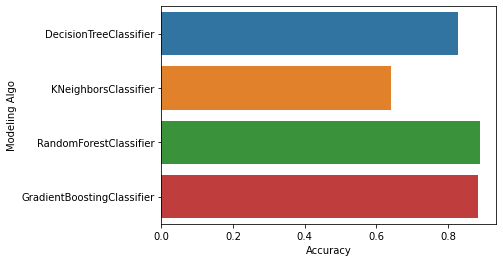

In [65]:
sns.barplot(y="Modeling Algo",x='Accuracy',data=model_df)

# Cross Validation

In [66]:
# now lets apply cross validation

from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=63)

model=[DecisionTreeClassifier(),KNeighborsClassifier(),
      RandomForestClassifier(),GradientBoostingClassifier()]

mod_names=['DecisionTreeClassifier','KNeighborsClassifier',
      'RandomForestClassifier','GradientBoostingClassifier']

kfold=KFold(n_splits=4,shuffle=True)
kfold

cvs=[]

for mod in range(len(model)):
    md=model[mod]
    md.fit(X_train,Y_train)
    pred=md.predict(X_test)
    cvs.append(cross_val_score(md,X,Y,cv=3).mean())
    
cv={'Modeling Algo':mod_names,'CV score':cvs}
cv_df=pd.DataFrame(cv)
cv_df

,Modeling Algo,CV score
0,DecisionTreeClassifier,0.787435
1,KNeighborsClassifier,0.602416
2,RandomForestClassifier,0.849106
3,GradientBoostingClassifier,0.838098


In [67]:
#Comparing cv score and accuracy score

compare=pd.DataFrame({})
compare['Modeling Algo']=mod_names
compare['Accuracy']=acc
compare['CV score']=cvs
compare['Diference']=[acc[0]-cvs[0],acc[1]-cvs[1],acc[2]-cvs[2],acc[3]-cvs[3]]
compare

,Modeling Algo,Accuracy,CV score,Diference
0,DecisionTreeClassifier,0.827839,0.787435,0.040404
1,KNeighborsClassifier,0.641026,0.602416,0.038610
2,RandomForestClassifier,0.890110,0.849106,0.041003
3,GradientBoostingClassifier,0.882784,0.838098,0.044686


The least difference is in KNeigbors Classifier.

**Classification Report for all 4 models**

In [68]:
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()

**Decision Tree**

In [69]:
#Train the model using training set

dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [70]:
#predict the response for dataset

predict=dtc.predict(X_test)

In [71]:
#imprt scikit learn module for acuracy score

from sklearn import metrics

#model accuracy, to check the model

print('Accuracy:',metrics.accuracy_score(Y_test,predict))

#classification report

print('Classification report:\n',metrics.classification_report(Y_test,predict))

Accuracy: 0.8058608058608059
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.76      0.80      0.78        75
           2       0.29      0.43      0.34        14
           3       0.84      0.76      0.80        85
           4       0.00      0.00      0.00         1
           5       0.40      0.29      0.33         7
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        44

    accuracy                           0.81       273
   macro avg       0.62      0.61      0.61       273
weighted avg       0.82      0.81      0.81       273



**Randomforest**

In [72]:
#Train the model using training set

rf.fit(X_train,Y_train)

#predict the response for dataset

predict=rf.predict(X_test)

#imprt scikit learn module for acuracy score

from sklearn import metrics

#model accuracy, to check the model

print('Accuracy:',metrics.accuracy_score(Y_test,predict))

#classification report

print('Classification report:\n',metrics.classification_report(Y_test,predict))

Accuracy: 0.8864468864468864
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.81      0.87      0.84        75
           2       0.75      0.64      0.69        14
           3       0.89      0.93      0.91        85
           4       0.00      0.00      0.00         1
           5       0.67      0.29      0.40         7
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        44

    accuracy                           0.89       273
   macro avg       0.73      0.67      0.69       273
weighted avg       0.88      0.89      0.88       273



**GradientBoosting**

In [73]:
#Train the model using training set

gb.fit(X_train,Y_train)

#predict the response for dataset

predict=gb.predict(X_test)

#imprt scikit learn module for acuracy score

from sklearn import metrics

#model accuracy, to check the model

print('Accuracy:',metrics.accuracy_score(Y_test,predict))

#classification report

print('Classification report:\n',metrics.classification_report(Y_test,predict))

Accuracy: 0.8827838827838828
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.81      0.87      0.84        75
           2       0.79      0.79      0.79        14
           3       0.88      0.89      0.89        85
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         7
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        44

    accuracy                           0.88       273
   macro avg       0.71      0.79      0.74       273
weighted avg       0.86      0.88      0.87       273



**KNN**

In [74]:
#Train the model using training set

knn.fit(X_train,Y_train)

#predict the response for dataset

predict=knn.predict(X_test)

#imprt scikit learn module for acuracy score

from sklearn import metrics

#model accuracy, to check the model

print('Accuracy:',metrics.accuracy_score(Y_test,predict))

#classification report

print('Classification report:\n',metrics.classification_report(Y_test,predict))

Accuracy: 0.6410256410256411
Classification report:
               precision    recall  f1-score   support

           0       0.20      0.44      0.28         9
           1       0.66      0.75      0.70        75
           2       0.15      0.21      0.18        14
           3       0.79      0.69      0.74        85
           4       0.00      0.00      0.00         1
           5       0.50      0.14      0.22         7
           6       0.60      0.47      0.53        38
           7       0.83      0.77      0.80        44

    accuracy                           0.64       273
   macro avg       0.47      0.44      0.43       273
weighted avg       0.67      0.64      0.65       273



# Hyper Tunning the Model

**Decision Tree**

In [75]:
Dtree_parameters={'max_depth':np.arange(2,15),
               'criterion':['gini','entropy'],
               'splitter':['best','random']}

In [76]:
dtree=GridSearchCV(DecisionTreeClassifier(),Dtree_parameters,cv=3)

dtree.fit(X_train,Y_train)

dtree.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [77]:
dtree_model=DecisionTreeClassifier(criterion= 'entropy', max_depth= 4,splitter='best')

dtree_model.fit(X_train,Y_train)

pred=dtree_model.predict(X_test)

print(accuracy_score(Y_test,pred)*100)
print(classification_report(Y_test, pred))



81.31868131868131
              precision    recall  f1-score   support

           0       0.44      0.78      0.56         9
           1       0.75      0.76      0.75        75
           2       0.00      0.00      0.00        14
           3       0.77      0.91      0.83        85
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         7
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        44

    accuracy                           0.81       273
   macro avg       0.49      0.55      0.52       273
weighted avg       0.76      0.81      0.78       273



**KNN**

In [78]:
KNN_param={'n_neighbors':np.arange(1,16),
          'weights':('uniform','distance'),
          'algorithm':('auto','ball_tree','kd_tree','brute')}

In [79]:
KNN=GridSearchCV(KNeighborsClassifier(),KNN_param,cv=3)

In [80]:
KNN.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'weights': ('uniform', 'distance')})

In [81]:
KNN.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [82]:
KNN_mod=KNeighborsClassifier(algorithm='auto',n_neighbors=3,weights='distance')
KNN_mod.fit(X_train,Y_train)
pred=KNN_mod.predict(X_test)
print(accuracy_score(Y_test,pred)*100)
print(classification_report(Y_test, pred))

70.6959706959707
              precision    recall  f1-score   support

           0       0.33      0.56      0.42         9
           1       0.76      0.72      0.74        75
           2       0.21      0.43      0.28        14
           3       0.78      0.75      0.77        85
           4       0.00      0.00      0.00         1
           5       0.50      0.29      0.36         7
           6       0.78      0.55      0.65        38
           7       0.91      0.93      0.92        44

    accuracy                           0.71       273
   macro avg       0.53      0.53      0.52       273
weighted avg       0.74      0.71      0.72       273



**Random Forest**

In [83]:
RFC_param={'bootstrap':[True,False],
          'max_depth':[10,20,30,40,None],
          'max_features':['auto','sqrt'],
          'min_samples_leaf':[1,2,4],
          'min_samples_split':[2,5,10],
          'n_estimators':[5,10,20,30,50],
          }

In [84]:
RFC=GridSearchCV(RandomForestClassifier(),RFC_param,cv=3)

In [85]:
RFC.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20, 30, 50]})

In [86]:
RFC.best_params_


{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [87]:
Randomforest=RandomForestClassifier(bootstrap=False,max_depth=30,min_samples_leaf=1,min_samples_split=2,
                                   max_features='sqrt',n_estimators=20)
Randomforest.fit(X_train,Y_train)

predrandom=Randomforest.predict(X_test)

print(accuracy_score(Y_test,predrandom)*100)
print(classification_report(Y_test,predrandom))

86.44688644688645
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.82      0.85      0.84        75
           2       0.47      0.57      0.52        14
           3       0.88      0.89      0.89        85
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         7
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        44

    accuracy                           0.86       273
   macro avg       0.63      0.63      0.63       273
weighted avg       0.85      0.86      0.86       273



Best Model is K Neigbors Classifier as by applying hyper tunning its accuracy increased to 70% and less errors also

# Saving Model

In [88]:
import joblib

joblib.dump(KNN_mod,'gppc.pkl')

['gppc.pkl']

**Model with Target variable: capacity_mw**

# Spliting the data and finding best random state

**For capacity mw**

In [89]:
y2=gpp['capacity_mw']
x2=gpp.drop(['capacity_mw'],axis=1)

**Model Bulding**

In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

x_train,x_test,Y_train,Y_test=train_test_split(x2,y2,test_size=.30,random_state=8)

model=[LinearRegression(),KNeighborsRegressor(n_neighbors=5),
      RandomForestRegressor(),GradientBoostingRegressor()]

mod_names=['Linear','KNN',
      'RF','GB']

r2=[]


In [95]:
for mod in range(len(model)):
    md=model[mod]
    md.fit(x_train,Y_train)
    pred=md.predict(x_test)
    r2.append(r2_score(Y_test,pred))
    
mdls={'Modeling Algo':mod_names,'R2 score':r2}

mdls=pd.DataFrame(mdls)
mdls

,Modeling Algo,R2 score
0,Linear,0.561664
1,KNN,0.521846
2,RF,0.836126
3,GB,0.833519


**Training the Model**

In [97]:
#now lets apply cross validation

from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

x_train,x_test,Y_train,Y_test=train_test_split(x2,y2,test_size=.30,random_state=8)

model=[LinearRegression(),KNeighborsRegressor(n_neighbors=5),
      RandomForestRegressor(),GradientBoostingRegressor()]

mod_names=['Linear','KNN',
      'RF','GB']

k_f=KFold(n_splits=4,shuffle=True)
k_f

cvs=[]

for mod in range(len(model)):
    md=model[mod]
    c=md.fit(x_train,Y_train)
    pred=md.predict(x_test)
    cvs.append(cross_val_score(c,x2,y2,cv=3).mean())
    
cv={'Modeling Algo':mod_names,'CV score':cvs}
cv_df=pd.DataFrame(cv)
cv_df

,Modeling Algo,CV score
0,Linear,0.488960
1,KNN,0.507564
2,RF,0.810655
3,GB,0.784708


Applied cross val score

In [98]:
#Comparing cv score and accuracy score

compare=pd.DataFrame({})
compare['Modeling Algo']=mod_names
compare['r2 score']=r2
compare['CV score']=cvs
compare['Diference']=[r2[0]-cvs[0],r2[1]-cvs[1],r2[2]-cvs[2],r2[3]-cvs[3]]
compare

,Modeling Algo,r2 score,CV score,Diference
0,Linear,0.561664,0.488960,0.072704
1,KNN,0.521846,0.507564,0.014282
2,RF,0.836126,0.810655,0.025471
3,GB,0.833519,0.784708,0.048811


The difference is least in random forest regressor

# HyperParameter Tunning

In [99]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_estimators' : [100,130,160],
    'criterion' : ('mse', 'mae'),
    'max_depth' : [2,4,6,8],
    'min_samples_split' : range(1,5)
}

In [100]:
grid = GridSearchCV(RandomForestRegressor(), param_grid = grid_param)

In [101]:
grid.fit(x_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'), 'max_depth': [2, 4, 6, 8],
                         'min_samples_split': range(1, 5),
                         'n_estimators': [100, 130, 160]})

In [102]:
best_parameters = grid.best_params_
print(best_parameters)

{'criterion': 'mae', 'max_depth': 8, 'min_samples_split': 3, 'n_estimators': 130}


In [103]:
#FINAL MODEL
#Substituting the best parameters in the RandomForestRegressor:

rf =  RandomForestRegressor(criterion = 'mae', max_depth = 8, min_samples_split = 3, n_estimators = 130)

rf.fit(x_train, Y_train)
pred = rf.predict(x_test)
rscore = r2_score(Y_test, pred)
rscore

0.8357071385982209

Received the r2 score as 83.57%

# Saving the Model

In [104]:
import joblib
joblib.dump(rf, 'gppr.pkl')

['gppr.pkl']